<h1> Python for Finance derekbanas / Python4Finance </h1>

https://www.youtube.com/watch?v=nNkKTJTu-mU


https://github.com/derekbanas/Python4Finance


playlist:

https://www.youtube.com/watch?v=nNkKTJTu-mU&list=PLGLfVvz_LVvTHOWIEBAl-YOr_FC8lRmWX

In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

In [3]:
from pandas_datareader import data as web # Reads stock data 
#run pip install pandas_datareader in anacona   powershell
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates

In [4]:
import mplfinance as mpf # Matplotlib finance
#pip install mplfinance
import time

## Holds Stocks Not Downloaded

In [5]:
stocks_not_downloaded = []
missing_stocks = []

## Function that Saves Stock Data to CSV

In [6]:
# Function that gets a dataframe by providing a ticker and 
# starting date


def save_to_csv_from_yahoo(folder, ticker, 
                           syear, smonth, sday, eyear, emonth, eday):
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    try:
        print("Get Data for : ", ticker)
        # Reads data into a dataframe
        df = web.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    
        # Wait 10 seconds
        time.sleep(10)
    
        # Save data to a CSV file
        df.to_csv(folder + ticker + '.csv')
        print("Saved  data for : ", ticker ,folder + ticker + '.csv')
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Couldn't Get Data for :", ticker)


## Function that Returns a Stock Dataframe from a CSV

In [7]:
# Reads a dataframe from the CSV file 
def get_stock_df_from_csv(folder, ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

## Add Daily Return to Dataframe


In [8]:
# We calculate a percentage rate of return for each day to compare 
# investments.
# Simple Rate of Return = 
#    (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    # Create a new  column ['daily_return']
    # .shift(1) take the previos  valu of 'daily_return'
    # The (-1) is for finding the percent   1.d means  50%
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
     
    folder = './'
    file_path =  folder + ticker + '.csv'
    df.to_csv(file_path)
    return df  

## Returns Average Total Daily Return over Time

In [9]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    # The 'daily return' column was creatd in the 
    #        ' add_daily_return_to_df'   function
    daily_ret = df.loc[mask]['daily_return'].mean()
    #  loc[mask] access a group of rows and columns of 'mask'
    # Get the number of days between 2 dates
    df2 = df.loc[mask]# This df2 will  contain only the rows of mask
    days = df2.shape[0]# Count the nuber of days

    # Return the total return between 2 dates
    return (days * daily_ret)

## Matplotlib Finance( not working)

In [10]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
   
    start = f"{syear}-{smonth}-{sday}"
     
    end = f"{eyear}-{emonth}-{eday}"
    
    
    try:
       folder = './'
       file_path =  folder + ticker + '.csv'
       df = pd.read_csv(file_path, index_col=0, parse_dates = True)

    except FileNotFoundError:
        print("File Doesn't Exist")
    else: 
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
       
        plt.plot(df_sub['Date'],df_sub['daily_return']  , "red")
        plt.xlabel('Date')
        plt.show()
        
        
        print(df_sub)
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)
       

## Simple Price Plot

In [11]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
       folder = './'
       file_path =  folder + ticker + '.csv'
       df = pd.read_csv(file_path, index_col=0, parse_dates = True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        print( df_sub.columns)
        #print("df_np",df_np)
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,2]
        
        # Get date from the 1st
        date_arr = df_np[:,0]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

In [12]:
 
folder = './' #Curennt  directory
ticker ='AMZN'    
 
(syear, smonth, sday)  = (2020, 1, 1)
(eyear, emonth, eday)  = (2021, 8, 19)
save_to_csv_from_yahoo(folder, ticker,syear,  smonth, sday, eyear, emonth, eday)

Get Data for :  AMZN
Saved  data for :  AMZN ./AMZN.csv


In [13]:

ticker_df = get_stock_df_from_csv(folder, ticker)
add_daily_return_to_df(ticker_df , ticker)
ticker_df
total_ret = get_return_defined_time(ticker_df,syear,  smonth, sday, eyear, emonth, eday)
print("Total return (presents) =",total_ret, '%')    

Total return (presents) = 0.6134218349559009 %


Index(['Date', 'Adj Close', 'daily_return'], dtype='object')


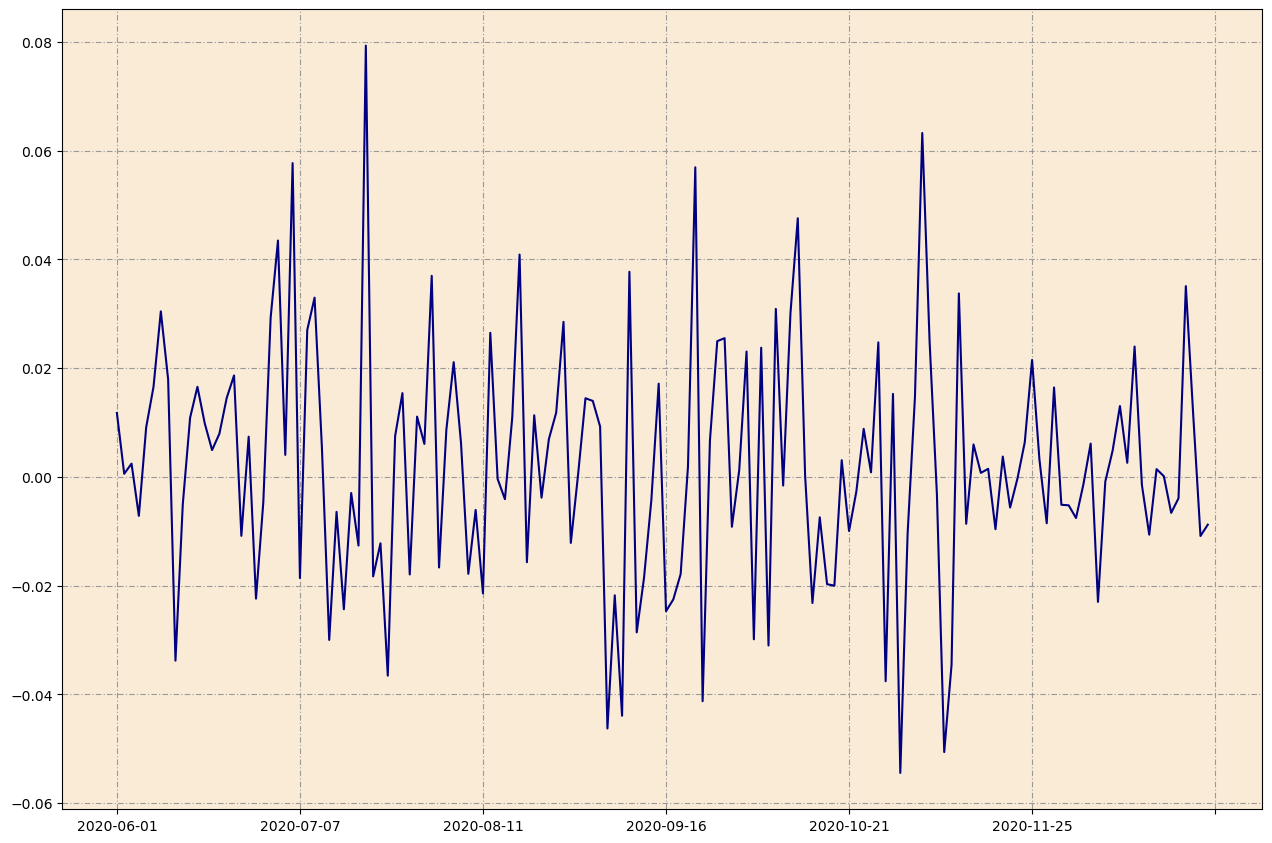

In [14]:
#price_plot(ticker, syear, smonth, sday, eyear, emonth, eday)
#mplfinance_plot(ticker, 'ohlc', syear, smonth, sday, eyear, emonth, eday) 
price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)   

## Download Multiple Stocks


In [15]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
   folder = './'
   print("Downloding ticker ",*args)
   for ticker in args:
        file_path =  folder + ticker + '.csv'
        save_to_csv_from_yahoo(folder, ticker, syear, smonth, sday, eyear, emonth, eday) 
       
   print("Downloding end ",*args)        

## Merge Multiple Stocks in One Dataframe by Column Name

In [16]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    print(" Merge", col_name, "from ",start, " to ",end)
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        print(x)
    return mult_df

In [17]:
# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG"]
download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

Downloding ticker  FB AAPL NFLX GOOG
Get Data for :  FB
Saved  data for :  FB ./FB.csv
Get Data for :  AAPL
Saved  data for :  AAPL ./AAPL.csv
Get Data for :  NFLX
Saved  data for :  NFLX ./NFLX.csv
Get Data for :  GOOG
Saved  data for :  GOOG ./GOOG.csv
Downloding end  FB AAPL NFLX GOOG


## Get Changing Value of Investment using Multiple Stocks

In [18]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [19]:
mult_df = merge_df_by_column_name('Adj Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

 Merge Adj Close from  2020-1-1  to  2021-1-1
FB
AAPL
NFLX
GOOG


,FB,AAPL,NFLX,GOOG
Date,,,,
2020-12-24,267.399994,131.352829,513.969971,1738.849976
2020-12-28,277.000000,136.050766,519.119995,1776.089966
2020-12-29,276.779999,134.239273,530.869995,1758.719971
2020-12-30,271.869995,133.094650,524.590027,1739.520020
2020-12-31,273.160004,132.069473,540.729980,1751.880005


FB       209.779999
AAPL      74.096458
NFLX     329.809998
GOOG    1367.369995
Name: 2020-01-02 00:00:00, dtype: float64

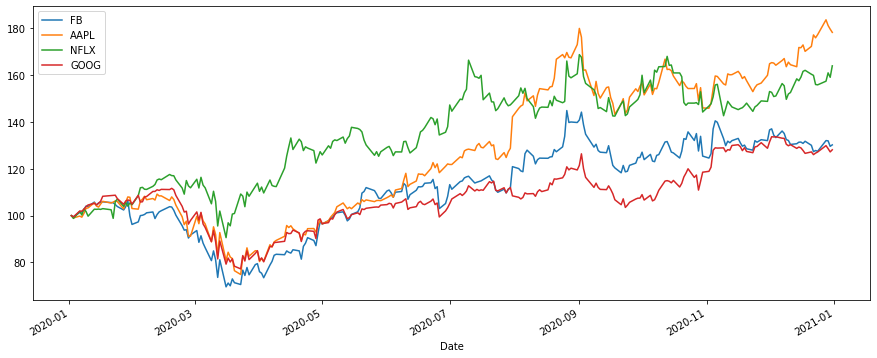

In [20]:
investment = 100
plot_return_mult_stocks(investment, mult_df)
mult_df.iloc[0]#return of the  first  date

## Get Standard Deviation for Multiple Stocks

Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.


Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set.n It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

$s^2$ = $\frac{\sum (x - \hat{x})^2}{N - 1}$

Example : If we have 3 annual returns of 23%, -8% and 15%. The mean return is 10%.

* $(23 - 10)^2$ = 169
* $(-8 - 10)^2$ = 324
* $(15 - 10)^2$ = 25
* = 169 + 324 + 25 = 518 / (3-1) = 259 = 2.59

---

Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicates that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

$\sqrt{s^2}$ = $\sqrt{2.59}$ = 1.609

In [21]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [22]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [23]:
# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df

# It is hard to compare stocks by standard deviation when their stock prices
# are so different. The coefficient of variation is the ratio between the 
# standard deviation and the mean and it provides a comparable standard deviation
# We get it by dividing the standard deviation by the mean cov = std / mean
# We see here that GOOG has the least amount of variability
# So  this is the less  risky stock

Stock: FB   Mean:  234.55 Standard deviation: 38.57
Coefficient of Variation: 0.1644238149761194

Stock: AAPL Mean:   94.60 Standard deviation: 21.85
Coefficient of Variation: 0.23099015231567172

Stock: NFLX Mean:  446.83 Standard deviation: 65.61
Coefficient of Variation: 0.14684116488739776

Stock: GOOG Mean: 1481.40 Standard deviation: 175.97
Coefficient of Variation: 0.11878452933446865



,FB,AAPL,NFLX,GOOG
Date,,,,
2020-01-02,209.779999,74.096458,329.809998,1367.369995
2020-01-03,208.669998,73.376083,325.899994,1360.660034
2020-01-06,212.600006,73.960770,335.829987,1394.209961
2020-01-07,213.059998,73.612923,330.750000,1393.339966
2020-01-08,215.220001,74.797089,339.260010,1404.319946
...,...,...,...,...
2020-12-24,267.399994,131.352829,513.969971,1738.849976
2020-12-28,277.000000,136.050766,519.119995,1776.089966
2020-12-29,276.779999,134.239273,530.869995,1758.719971
